In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import zipfile
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

COBA GITHUB LINK

In [1]:
!git clone https://github.com/shafidaaaa/Bangkit.git

Cloning into 'Bangkit'...
remote: Enumerating objects: 495, done.
remote: Counting objects: 100% (495/495), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 495 (delta 57), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (495/495), 141.05 MiB | 22.58 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (322/322), done.


In [6]:
# Define the path to the images directory
image_directory = '/content/Bangkit/Capstone/bisindo_data/Citra BISINDO'

# Load the images
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    image_directory,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(224, 224)  # Adjust the image size as needed
)

Found 312 files belonging to 26 classes.


In [5]:
# Split the dataset into training and testing sets
train_dataset_size = int(0.8 * len(image_dataset))  # 80% for training
test_dataset_size = len(image_dataset) - train_dataset_size  # 20% for testing

train_dataset = image_dataset.take(train_dataset_size)
test_dataset = image_dataset.skip(train_dataset_size)



print(f'Training set size: {len(train_dataset)} batches')
print(f'Test set size: {len(test_dataset)} batches')


Training set size: 8 batches
Test set size: 2 batches


In [7]:
# Initialize lists to hold images and labels
images = []
labels = []

# Set the image size (height, width)
image_size = (256, 256)

# Load images and labels
for label in os.listdir(image_directory):
    label_path = os.path.join(image_directory, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels_categorical = keras.utils.to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/15
8/8 [==============================] - 19s 2s/step - loss: 8.5337 - accuracy: 0.0120 - val_loss: 3.2987 - val_accuracy: 0.0159
Epoch 2/15
8/8 [==============================] - 17s 2s/step - loss: 3.3492 - accuracy: 0.0482 - val_loss: 3.3226 - val_accuracy: 0.0476
Epoch 3/15
8/8 [==============================] - 19s 2s/step - loss: 3.2838 - accuracy: 0.0482 - val_loss: 3.2651 - val_accuracy: 0.0317
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 3.2666 - accuracy: 0.0803 - val_loss: 3.2416 - val_accuracy: 0.0635
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 3.1954 - accuracy: 0.2731 - val_loss: 3.1842 - val_accuracy: 0.2222
Epoch 6/15
8/8 [==============================] - 17s 2s/step - loss: 3.0009 - accuracy: 0.3092 - val_loss: 2.9796 - val_accuracy: 0.2698
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 2.4666 - accuracy: 0.5301 - val_loss: 2.5226 - val_accuracy: 0.5079
Epoch 8/15
8/8 [==================

***DONT USE THIS BELOW***

GOOGLE DRIVE LINK

In [ ]:
# Install PyDrive
!pip install -U -q PyDrive2

# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# This link should be the shared link from your other Google Drive account
shared_link = 'https://drive.google.com/file/d/11s3hFQiFapReSnRBEAVloiPBWP0BXzSw/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/d/')[1].split('/')[0]

# Download the file
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('archive.zip')

# Unzip the file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Path to the unzipped data
data_path = 'data/Citra BISINDO/'


In [ ]:
# Initialize lists to hold images and labels
images = []
labels = []

# Set the image size (height, width)
image_size = (256, 256)

# Load images and labels
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels_categorical = keras.utils.to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)



# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Conv2D(16, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/15
8/8 [==============================] - 29s 2s/step - loss: 3.6453 - accuracy: 0.0643 - val_loss: 3.1816 - val_accuracy: 0.2222
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 3.0846 - accuracy: 0.2329 - val_loss: 3.0282 - val_accuracy: 0.1905
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 2.5427 - accuracy: 0.4177 - val_loss: 2.4198 - val_accuracy: 0.3651
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 1.8069 - accuracy: 0.5904 - val_loss: 1.8569 - val_accuracy: 0.5714
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 1.1594 - accuracy: 0.7590 - val_loss: 1.2314 - val_accuracy: 0.6984
Epoch 6/15
8/8 [==============================] - 20s 3s/step - loss: 0.7577 - accuracy: 0.8112 - val_loss: 0.9647 - val_accuracy: 0.7460
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.4142 - accuracy: 0.9036 - val_loss: 0.8080 - val_accuracy: 0.7937
Epoch 8/15
8/8 [==================

***DONT USE THIS ABOVE***

2/2 [==============================] - 1s 576ms/step


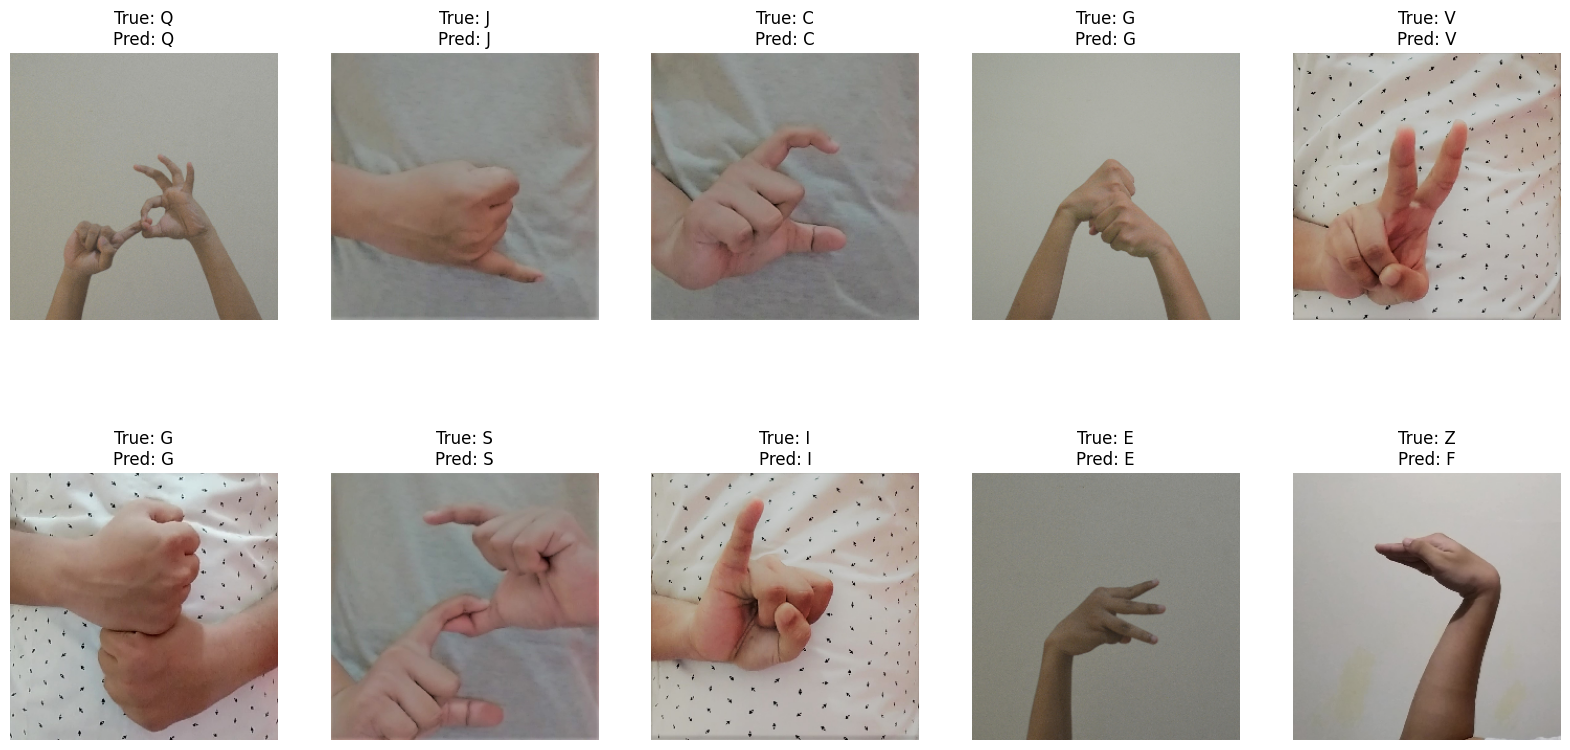

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to class labels
true_labels = np.argmax(y_test, axis=1)

# Display the images with their predicted labels
def display_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the first 10 images and their predictions
display_predictions(X_test, true_labels, predicted_labels, label_encoder.classes_, num_images=10)

Saving test3.jpg to test3.jpg
Saving test2.jpg to test2.jpg
Saving test1.jpg to test1 (8).jpg


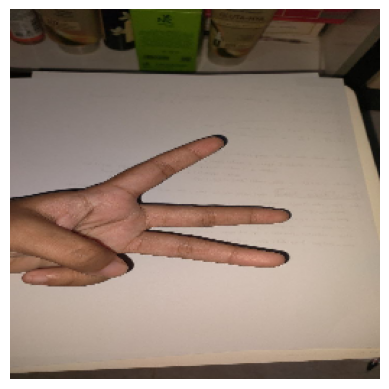

1/1 [==============================] - 0s 37ms/step
The model predicts that this image is: Z


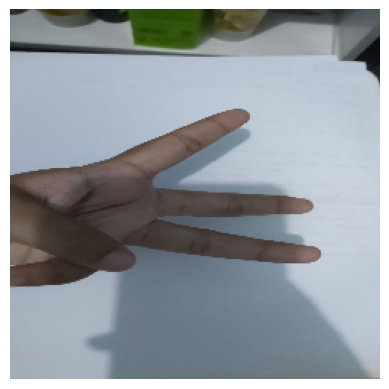

1/1 [==============================] - 0s 49ms/step
The model predicts that this image is: K


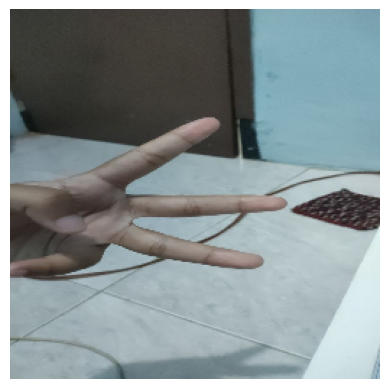

1/1 [==============================] - 0s 36ms/step
The model predicts that this image is: W


In [ ]:
# Function to upload and predict an image
def upload_and_predict(model, label_encoder):
    from google.colab import files
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image
        img_path = fn
        img = load_img(img_path, target_size=(256, 256))  # Ensure the image is resized to 64x64
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Predict the class
        predictions = model.predict(img_array)
        predicted_label = np.argmax(predictions, axis=1)
        predicted_class = label_encoder.inverse_transform(predicted_label)

        print(f'The model predicts that this image is: {predicted_class[0]}')

        # Delete the uploaded image
        os.remove(img_path)

# Call the function to upload and predict an image
upload_and_predict(model, label_encoder)

ABOVE IS TRYINGG

In [ ]:
data_path = '/content/dataset_bisindo.zip'
extract_path = '/content/data/'

# Check if the file is a zip file
if zipfile.is_zipfile(data_path):
    with zipfile.ZipFile(data_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f'Extracted to {extract_path}')
else:
    print('The provided file is not a valid zip file.')


The provided file is not a valid zip file.


In [ ]:
extract_path = '/content/Citra BISINDO'

In [ ]:
# Initialize lists to hold images and labels
images = []
labels = []

# Set the image size (height, width)
image_size = (64, 64)

# Load images and labels
for label in os.listdir(extract_path):
    label_path = os.path.join(extract_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/'

In [ ]:
# Normalize the images
images = images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels_categorical = keras.utils.to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)


In [ ]:
# datagen = ImageDataGenerator(
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=False,
#     fill_mode='nearest'
# )

In [ ]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Train the model
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/5
8/8 [==============================] - 4s 438ms/step - loss: 0.8282 - accuracy: 0.7349 - val_loss: 1.4066 - val_accuracy: 0.6508
Epoch 2/5
8/8 [==============================] - 4s 462ms/step - loss: 0.6558 - accuracy: 0.7912 - val_loss: 0.8710 - val_accuracy: 0.6984
Epoch 3/5
8/8 [==============================] - 3s 334ms/step - loss: 0.5401 - accuracy: 0.8474 - val_loss: 0.8078 - val_accuracy: 0.7460
Epoch 4/5
8/8 [==============================] - 3s 341ms/step - loss: 0.4447 - accuracy: 0.8755 - val_loss: 0.7554 - val_accuracy: 0.7143
Epoch 5/5
2/2 [==============================] - 0s 87ms/step - loss: 0.9592 - accuracy: 0.7460
Test accuracy: 0.7460


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FROM ROBOFLOW

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JbOPvp3TOZCHDtx1xviF")
project = rf.workspace("ta-jaywu").project("bisindo-upcxl")
version = project.version(5)
dataset = version.download("tensorflow")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bisindo-5 in tensorflow:: 100%|██████████| 1876/1876 [00:00<00:00, 6390.95it/s]


In [ ]:
dataset